# Explore here

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

os.makedirs("../data/raw", exist_ok=True)

data.to_csv("../data/raw/medical_data.csv", index=False)

medical_data = pd.DataFrame(data)

medical_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
medical_data['num_smoker'] = medical_data['smoker'].replace({'yes': 1, 'no': 0})
medical_data['num_sex'] = medical_data['sex'].replace({'male': 1, 'female': 0})

medical_data.head(5)

/tmp/ipykernel_2565/1862557798.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_data['num_smoker'] = medical_data['smoker'].replace({'yes': 1, 'no': 0})
/tmp/ipykernel_2565/1862557798.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_data['num_sex'] = medical_data['sex'].replace({'male': 1, 'female': 0})


,age,sex,bmi,children,smoker,region,charges,num_smoker,num_sex
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [20]:
medical_data.shape

(1338, 9)

In [21]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   num_smoker  1338 non-null   int64  
 8   num_sex     1338 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 94.2+ KB


In [17]:
#Eliminate Duplicates
print(f"The number of duplicated age records is: {medical_data['age'].duplicated().sum()}")
print(f"The number of duplicated sex records is: {medical_data['sex'].duplicated().sum()}")
print(f"The number of duplicated regions records is: {medical_data['region'].duplicated().sum()}")
print(f"The number of duplicated charges records is: {medical_data['charges'].duplicated().sum()}")

The number of duplicated age records is: 1291
The number of duplicated sex records is: 1336
The number of duplicated regions records is: 1334
The number of duplicated charges records is: 1


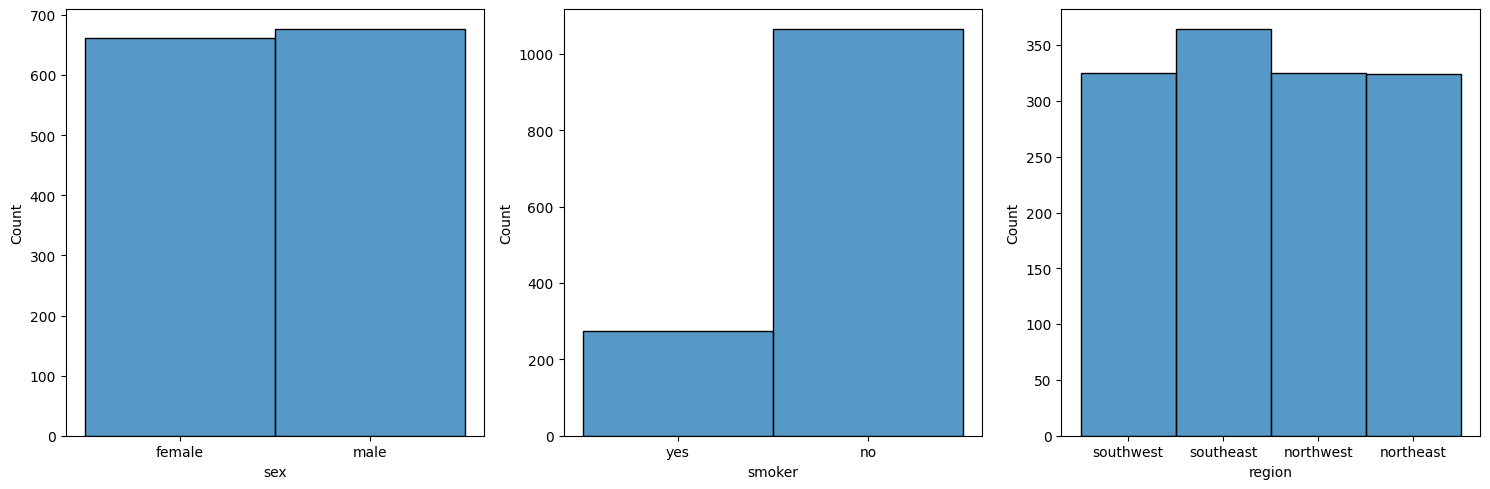

In [25]:
#Analysis of univariate variables (Categorical)

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

# Create Histogram
sns.histplot(ax = axis[0], data = medical_data, x = "sex")
sns.histplot(ax = axis[1], data = medical_data, x = "smoker")
sns.histplot(ax = axis[2], data = medical_data, x = "region")


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

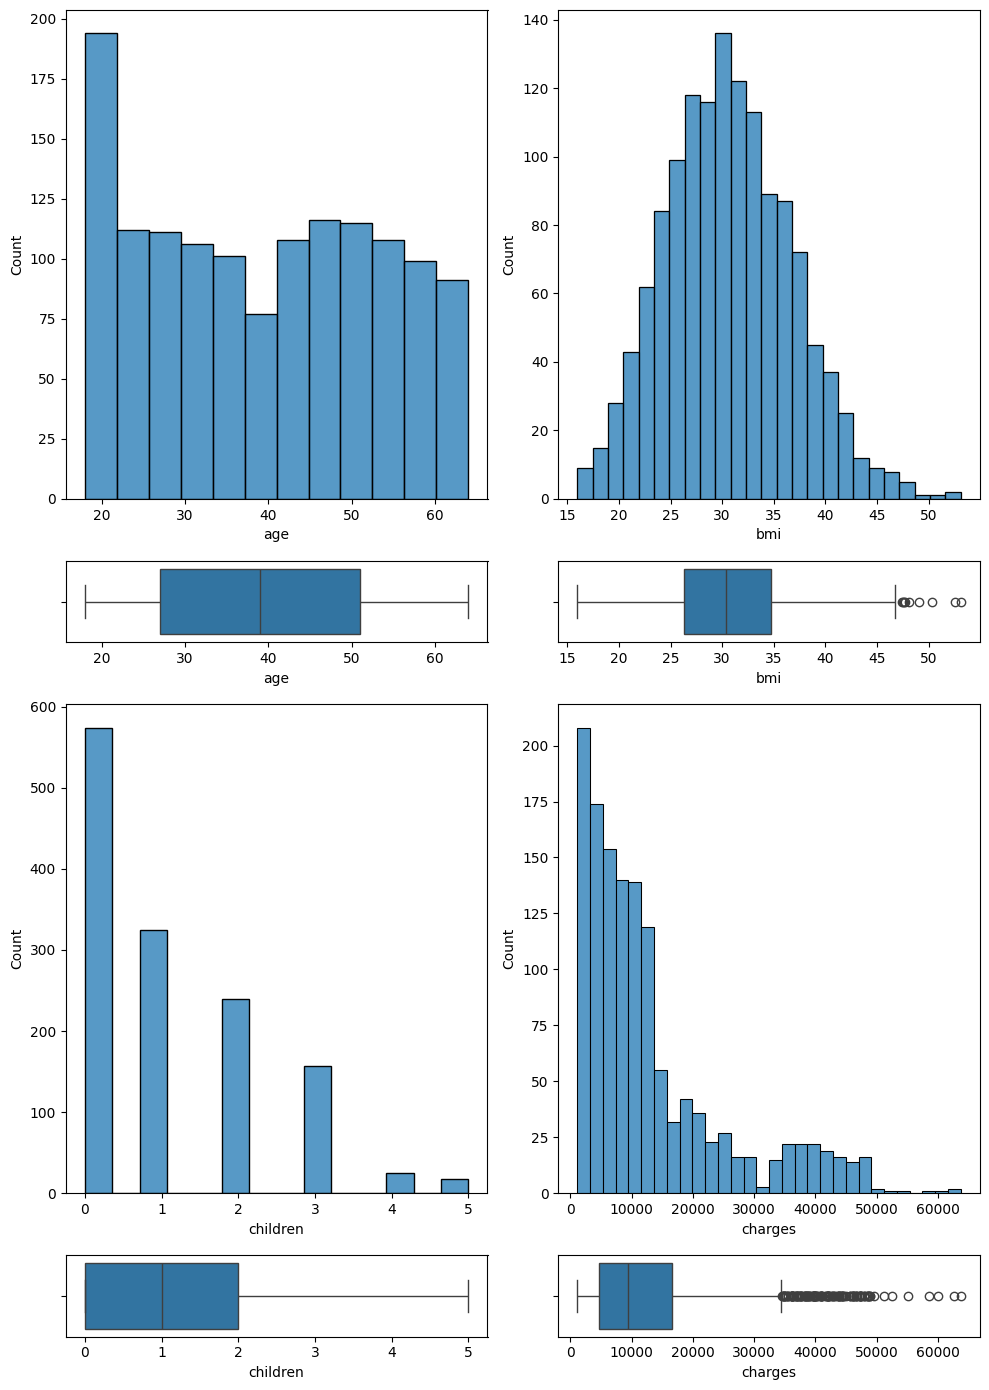

In [38]:
#Analysis of univariate variables (Numerical)

fig, axis = plt.subplots(4, 2, figsize = (10, 14),  gridspec_kw = {"height_ratios": [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = medical_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = medical_data, x = "age")

sns.histplot(ax = axis[0, 1], data = medical_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = medical_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = medical_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = medical_data, x = "children")

sns.histplot(ax = axis[2, 1], data = medical_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = medical_data, x = "charges")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

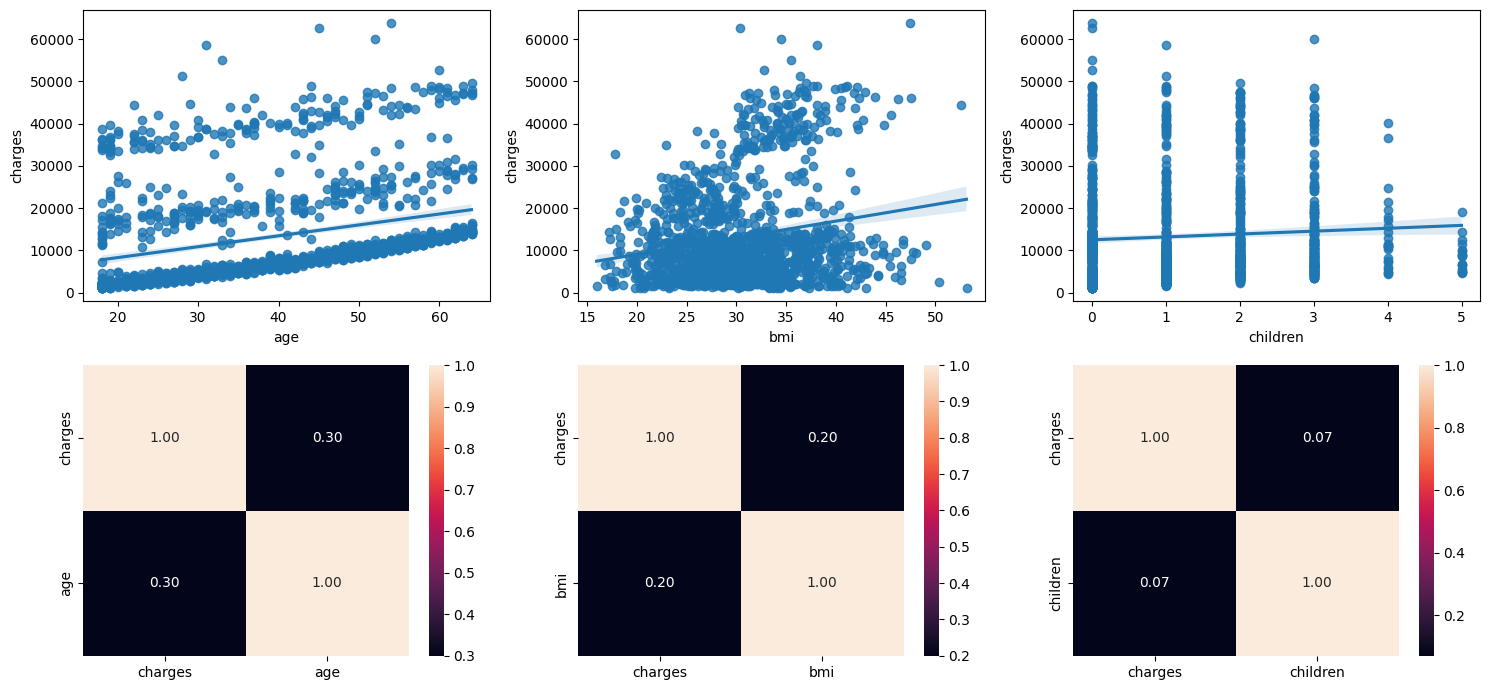

In [50]:
# Numerical-Numerical Analysis

fig, axis = plt.subplots(2, 3, figsize = (15, 7))


# Create Plates 
sns.regplot(ax = axis[0, 0], data = medical_data, x = "age", y = "charges")
sns.heatmap(medical_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])

sns.regplot(ax = axis[0,1], data = medical_data, x = "bmi", y = "charges")
sns.heatmap(medical_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = medical_data, x = "children", y = "charges")
sns.heatmap(medical_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

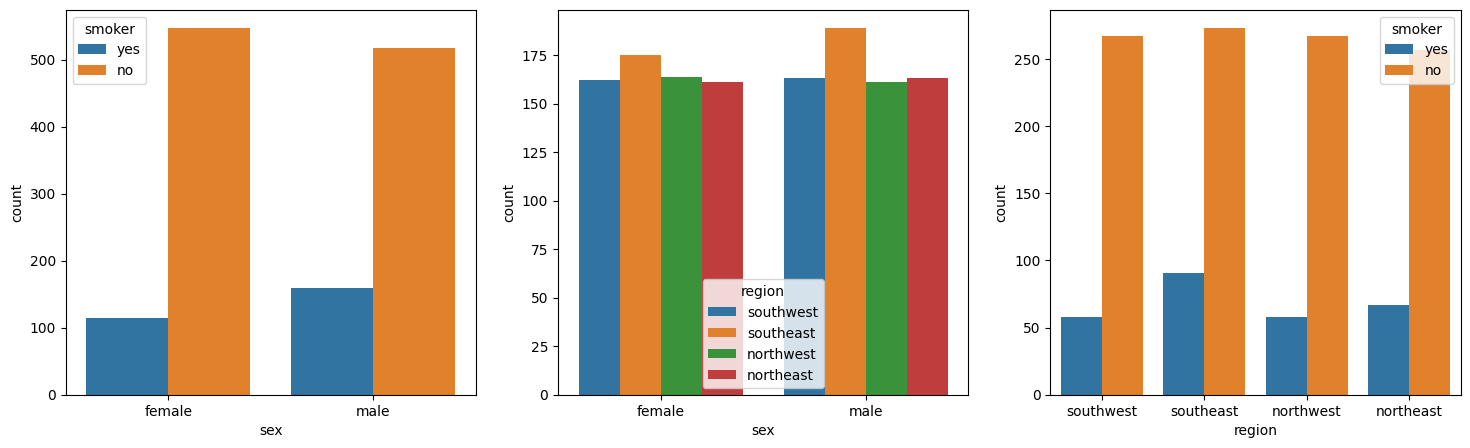

In [64]:
#Categorical-categorical analysis

fig, axis = plt.subplots(1, 3, figsize = (18, 5))

sns.countplot(ax = axis[0], data = medical_data, x = "sex", hue = "smoker")
sns.countplot(ax = axis[1], data = medical_data, x = "sex", hue = "region")
sns.countplot(ax = axis[2], data = medical_data, x = "region", hue = "smoker")

# Show the plot
plt.show()


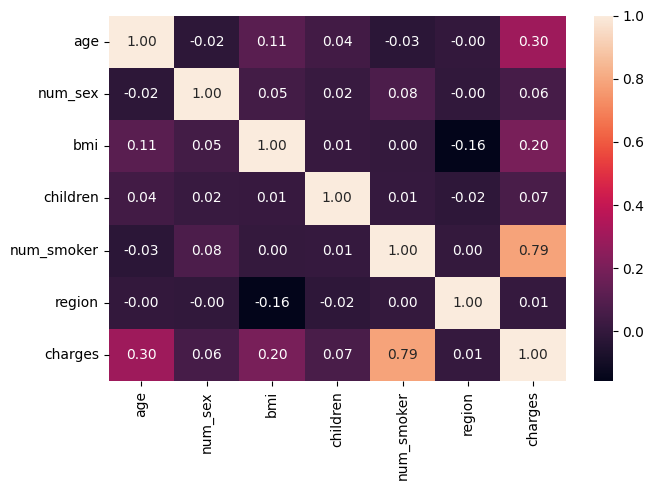

In [67]:
#Numerical-Categorical analysis

medical_data["region"] = pd.factorize(medical_data["region"])[0]

fig, axes = plt.subplots(figsize=(7, 5))

sns.heatmap(medical_data[["age", "num_sex", "bmi", "children", "num_smoker","region", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()


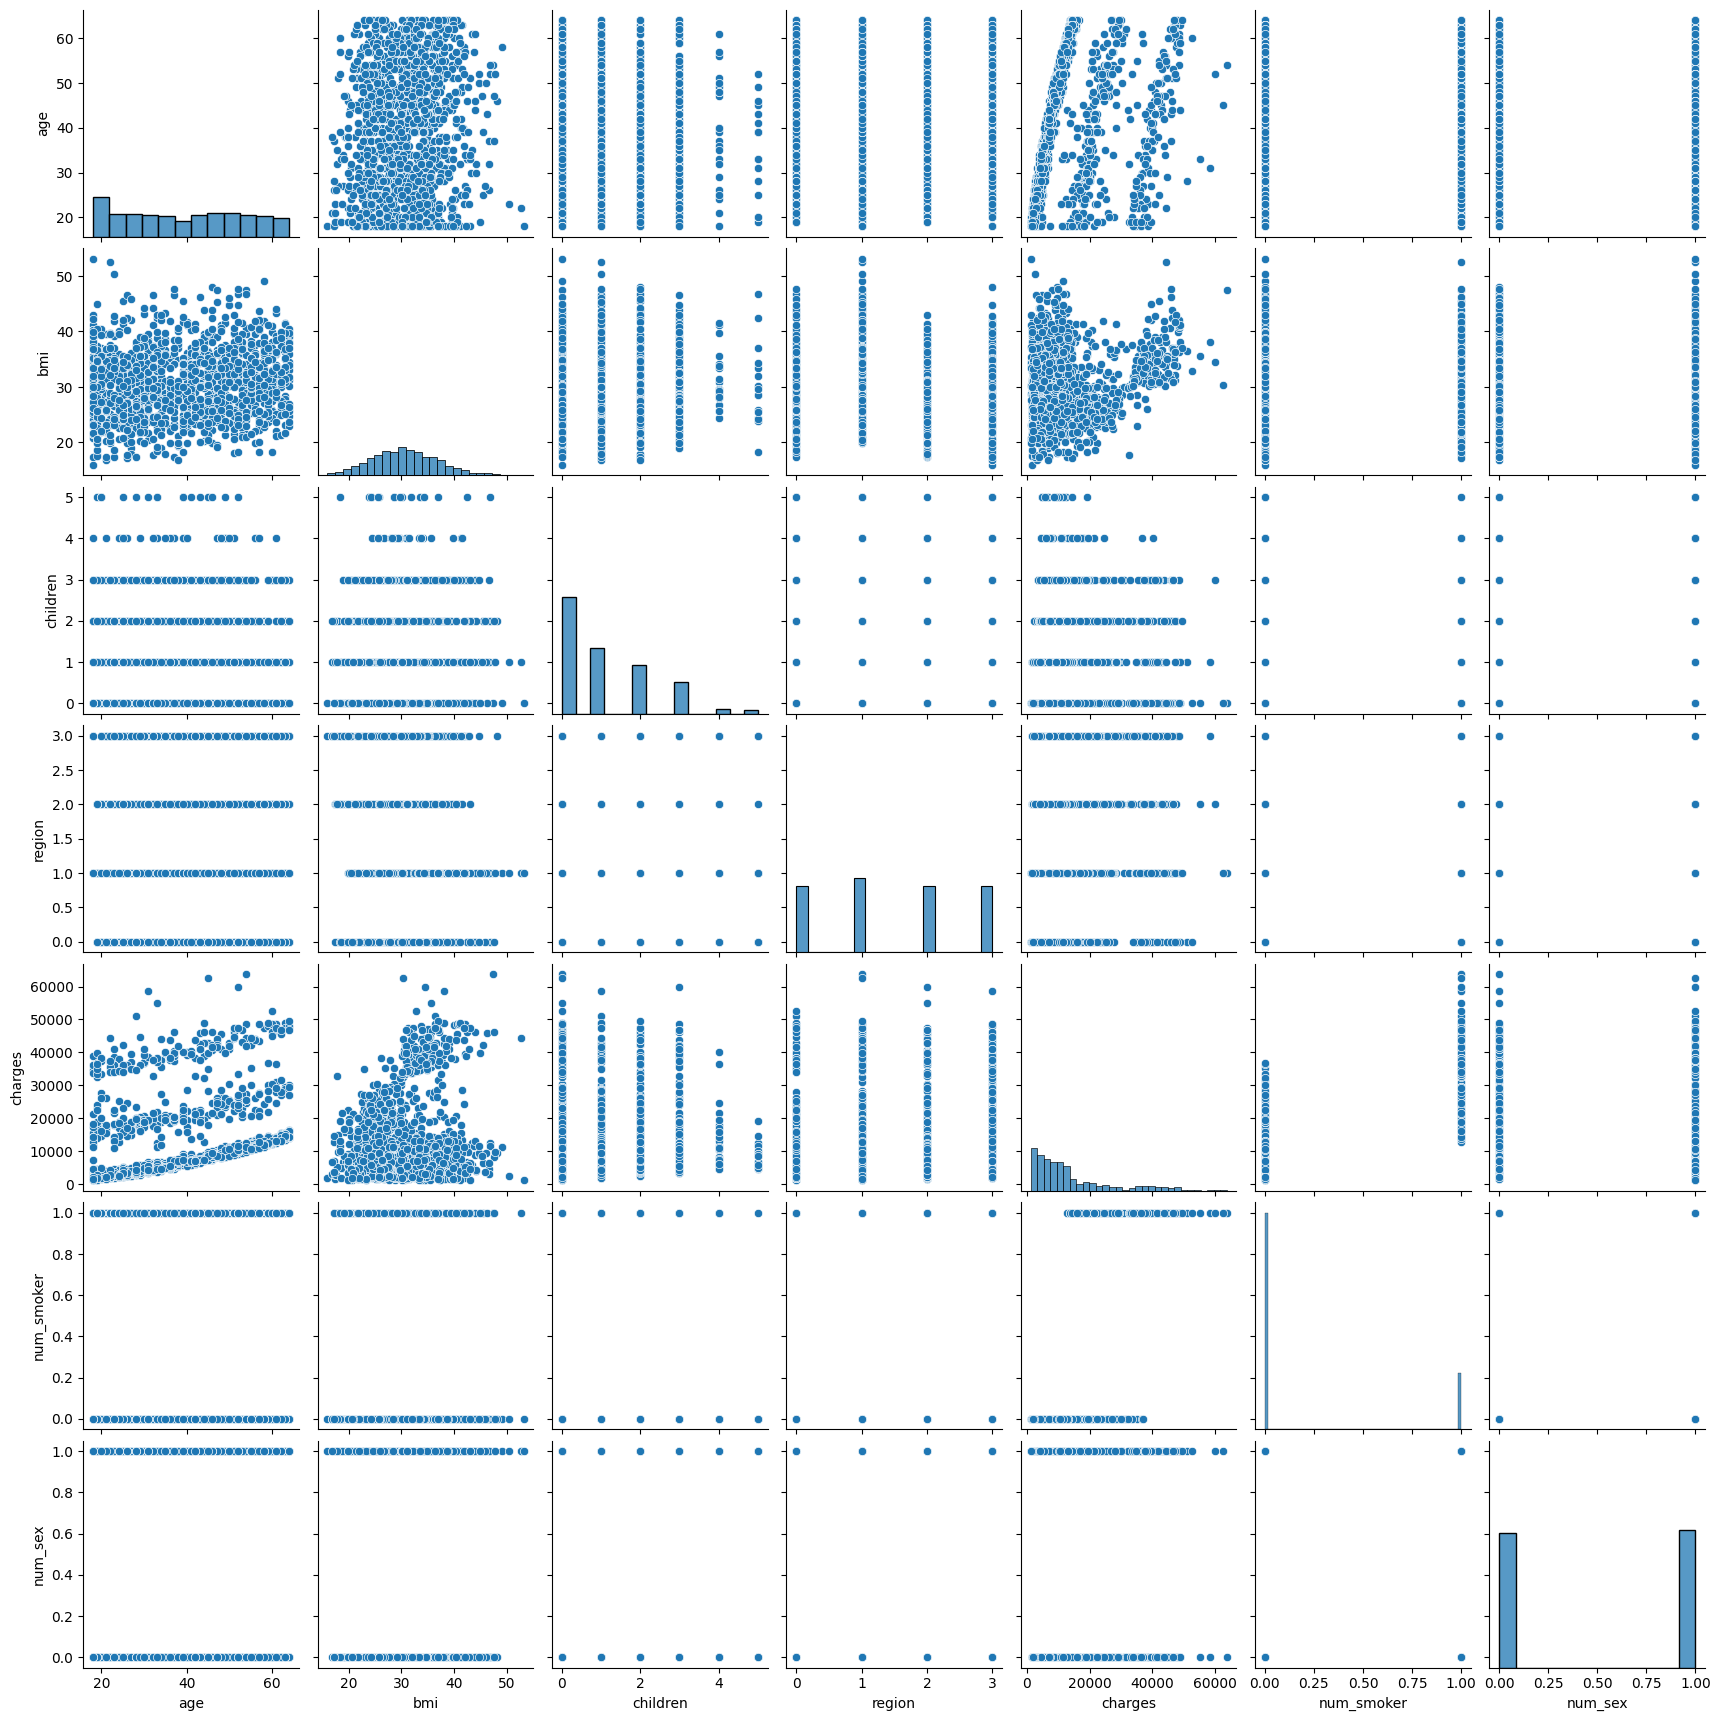

In [68]:
#Analysing all the Data at Once

sns.pairplot(data = medical_data)

In [69]:
#Feature engineering (Outlier analysis)

medical_data.describe()

,age,bmi,children,region,charges,num_smoker,num_sex
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1.484305,13270.422265,0.204783,0.505232
std,14.049960,6.098187,1.205493,1.104885,12110.011237,0.403694,0.500160
min,18.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,1.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,1.000000,9382.033000,0.000000,1.000000
75%,51.000000,34.693750,2.000000,2.000000,16639.912515,0.000000,1.000000
max,64.000000,53.130000,5.000000,3.000000,63770.428010,1.000000,1.000000


<Axes: ylabel='charges'>

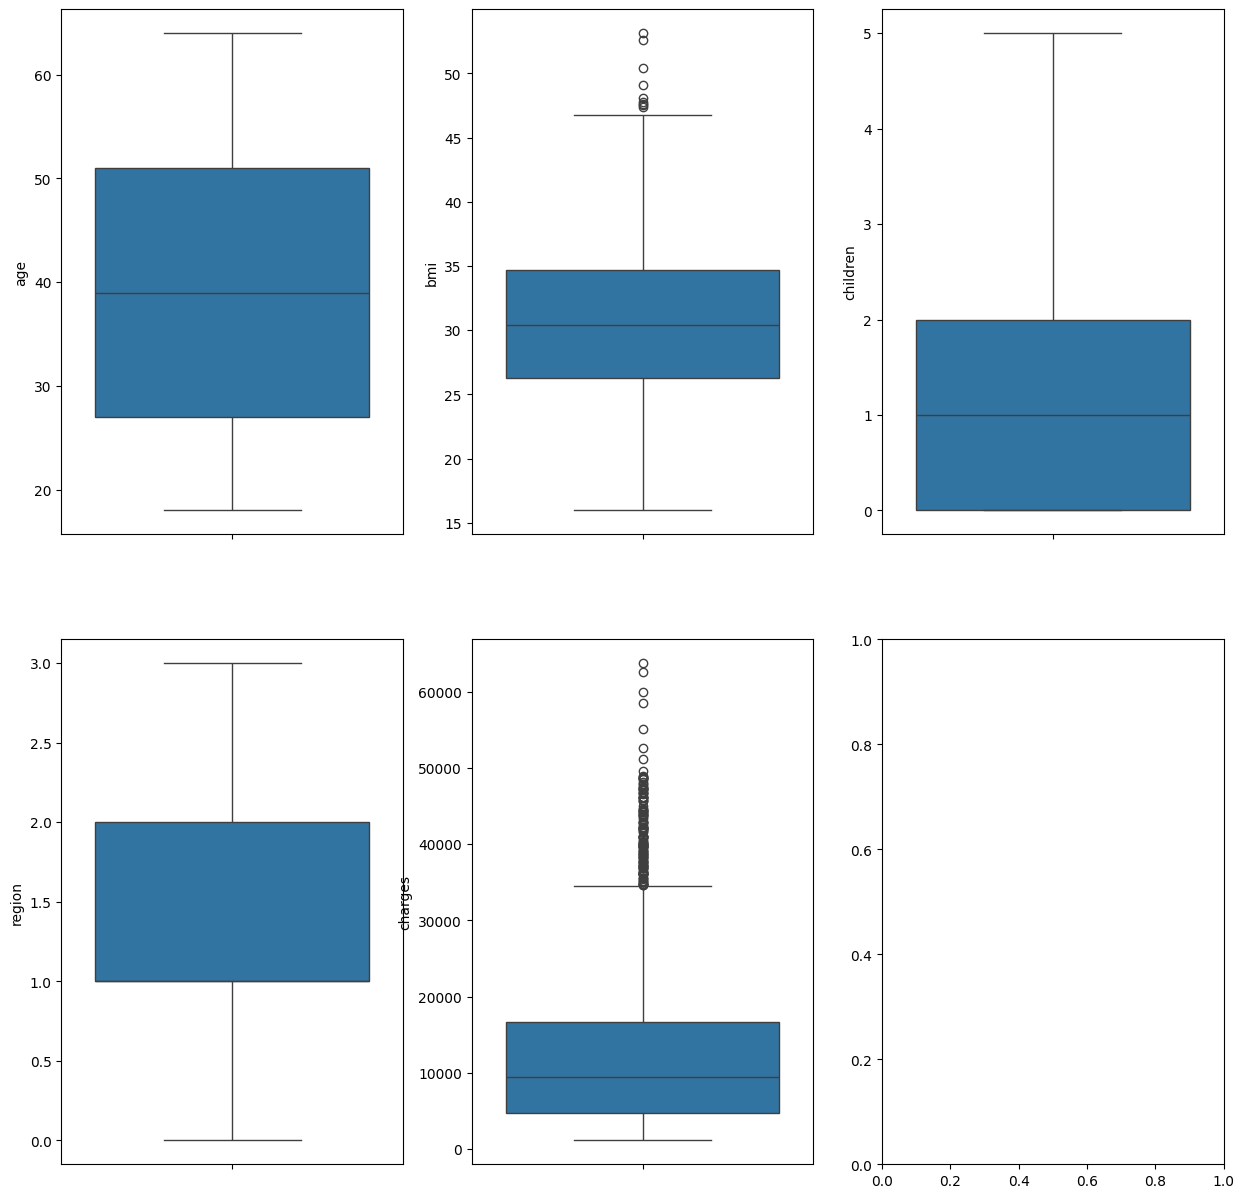

In [ ]:
#finding outliers 
fig, axes = plt.subplots(2, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = medical_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = medical_data, y = "bmi")
sns.boxplot(ax = axes[0, 2], data = medical_data, y = "children")
sns.boxplot(ax = axes[1, 0], data = medical_data, y = "region")
sns.boxplot(ax = axes[1, 1], data = medical_data, y = "charges")


In [75]:
# Count NaN

medical_data.isnull().sum().sort_values(ascending = False)

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
num_smoker    0
num_sex       0
dtype: int64

In [76]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "num_sex", "bmi", "children", "num_smoker", "region", "charges"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(medical_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = medical_data.index, columns = num_variables)
df_scal.head()

,age,num_sex,bmi,children,num_smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.666667,0.043816


In [78]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("charges", axis = 1)
y = df_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,age,num_sex,bmi,children,num_smoker
0,0.608696,0.0,0.107345,0.4,0.0
1,0.630435,0.0,0.224913,0.0,0.0
2,0.739130,0.0,0.239440,0.0,0.0
3,0.456522,0.0,0.493947,1.0,0.0
4,0.782609,0.0,0.148238,0.6,0.0


In [79]:
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [82]:
train_data = pd.read_csv("/workspaces/Linear-Regression-Template-Dev/data/processed/clean_train.csv")
test_data = pd.read_csv("/workspaces/Linear-Regression-Template-Dev/data/processed/clean_test.csv")

train_data.head()

,age,num_sex,bmi,children,num_smoker
0,0.608696,0.0,0.107345,0.4,0.0
1,0.630435,0.0,0.224913,0.0,0.0
2,0.739130,0.0,0.239440,0.0,0.0
3,0.456522,0.0,0.493947,1.0,0.0
4,0.782609,0.0,0.148238,0.6,0.0


In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): -0.062192144396228305
Coefficients (b): [ 1.88744789e-01 -2.99950365e-04  1.99222443e-01  3.39266773e-02
  3.77467899e-01  1.29907675e-02]


In [85]:
y_pred = model.predict(X_test)
y_pred

array([ 1.24544508e-01,  9.56833115e-02,  5.71236482e-01,  1.33857851e-01,
        4.13281304e-01,  1.54335655e-01, -1.42952294e-02,  2.52533236e-01,
       -1.04141439e-03,  1.61951799e-01,  4.29805993e-01,  1.32524836e-01,
        6.71116593e-02,  5.95994382e-01,  6.25417979e-01,  5.75035397e-01,
        2.26119263e-01,  5.56168956e-01,  1.28611131e-01,  4.85070382e-01,
        4.27131451e-02,  1.42843746e-01,  1.90060510e-02,  9.50147959e-02,
        1.63299832e-01,  1.88127197e-01,  2.12725945e-01,  8.11477001e-02,
        1.40388467e-01,  1.78396205e-02,  1.26717702e-01,  1.91523786e-01,
        5.58006993e-02,  3.74476047e-02,  5.23695138e-02,  1.89087240e-01,
        1.28585743e-02,  1.21886997e-01,  5.14017895e-01,  5.03069919e-01,
        4.35851027e-02,  5.18531170e-02,  2.06850525e-01,  1.65315230e-01,
        1.23025784e-01,  1.74373973e-01,  6.70555182e-02,  3.15863303e-02,
        5.49489642e-01,  1.28969266e-01,  2.35797361e-01,  2.04979373e-02,
        1.79982552e-01,  

In [86]:
from sklearn.metrics import mean_squared_error as mse, r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.008569826799446187
Coefficient of determination: 0.7833463107364539


In [88]:
from sklearn.linear_model import Lasso

# Load of train and test data
# These data must have been standardized and correctly processed in a complete EDA

lasso_model = Lasso(alpha = 0.1, max_iter = 300)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

In [90]:
from sklearn.linear_model import Ridge

# Load of train and test data
# These data must have been standardized and correctly processed in a complete EDA

ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error as mse, r2_score

print(f"Mean squared error: {mse(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.008570665554452992
Coefficient of determination: 0.7833251061811151
